<div align="center">

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.png)](https://colab.research.google.com/github/wisaaco/CURS_AdministracioAnaliticaAvancadaDeDades/blob/main/lessons/6_algoritmes_supervisats.ipynb)

Si no funciona el botó podeu copiar el següent [enllaç](https://colab.research.google.com/github/wisaaco/CURS_AdministracioAnaliticaAvancadaDeDades/blob/main/lessons/6_algoritmes_supervisats.ipynb)

</div>

# Unitat 6: Algoritmes Supervisats: Regressió i Classificació

En aquesta unitat continuem aprofundint en les tècniques de *Machine Learning*. Particularment introduirem mètodes de **classificació** i **regressió**.

### El procés d'aprenentatge

El procés d'aprenentatge automàtic sol constar d'una sèrie de passos. En general, aquests són:
- Preparació de dades. Càrrega i neteja de dades.
- Selecció d'atributs o mètriques adequades.
- Selecció de la tècnica a aplicar.
- Ajust dels hiperparàmetres.
- Avaluació del model.


Un dels elements claus a qualsevol algoritme supervisat d'aprenentatge automàtic és la divisió entre train i test.

La divisió entre conjunts de dades de train (entrenament) i test (prova) és fonamental en l'aprenentatge automàtic (ML) per diverses raons. Primerament, el conjunt de train s'utilitza per entrenar el model, ajustant els seus paràmetres per aprendre les relacions entre les característiques i les etiquetes de les dades. D'altra banda, el conjunt de test permet avaluar la capacitat del model per generalitzar a dades noves i no vistes.

Aquesta separació és crucial per evitar l'**overfitting**, una situació en la qual el model aprèn massa bé les característiques del conjunt d'entrenament, incloent el soroll, i no es comporta bé amb dades noves. A més, avaluar el model en un conjunt de test independent proporciona una estimació més realista del seu rendiment en situacions del món real, assegurant que les decisions basades en el model siguin fiables i efectives. En resum, una bona divisió entre train i test és essencial per garantir la robustesa i l'eficàcia dels models d'aprenentatge automàtic.

A Python disposam d'una llibreria ``scikit-learn`` que és la que ja emprada en unitat anterior i que té implementat també com fer aquesta divisió.


```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```


## Classificació

L'objectiu de la classificació és predir les etiquetes de classe de noves instàncies. Aquestes etiquetes de classe són valors discrets i desordenats que poden entendre's com la filiació de la instància al grup.

Existeixen dos tipus de classificadors segons el nombre de classes:
- Binaris. Prediuen un resultat binari. Hi ha dos tipus de classes, per exemple: *yes/no, pass/fail, spam/not spam, etc.*
- Multiclasse. Com s'indica existeixen més de dues classes, per exemple: *gèneres narratius, etiquetes mediambientals, etc.*

En la classificació hi ha dos grups d'algorismes:
- Models lineals:
    - *Logistic Regression* / Regressió logística.
    - *Support Vector Machines* / Màquines de vectors de suport (SVM)
    - *Naïve Bayes*.
- Models no lineals:
    - K-Nearest Neighbors K-NN / K-pròxims veïns
    - Decision Tree / Arbres de decisió
    - Random Forest Classification
    - Multi-*layer percentron (MLP)
    - Boosting

I un conjunt de mètriques d'avaluació:
- Matriu de confusió: *True positive TP*, FP, FN, TN, ...
- I indicadors mitjans com: **F1-score**, **precisió** i **recall**


### Mètriques de classificació 

Les mètriques de rendiment són fonamentals en l'àmbit del machine learning (ML) perquè permeten avaluar la qualitat i precisió dels models. Escollir la mètrica adequada és essencial, ja que influeix en com es mesuren els errors o encerts i en com s'optimitzen els models. Les mètriques proporcionen informació objectiva sobre el rendiment del model, permetent comparacions entre diferents enfocaments i ajudant a identificar àrees de millora. A més, una bona comprensió de les mètriques és clau per assegurar que els models siguin fiables i útils en la resolució de problemes reals.

Las principales métricas de classificació son les següents: 


- **Exactitud (Accuracy)**: nombre de prediccions correctes com a ràtio de totes les prediccions fetes $ \frac{TP+TN}{Total}.$
- **Precisió (Precision)**: percentatge de resultats positius correctes sobre el total de resultats positius $\frac{TP}{Results} = \frac{TP}{TP+FP}$
- **Recuperació (Recall)**: $\frac{TP}{Predictive Results} = \frac{TP}{TP+FN}$
- **f1-score**: és la mitjana harmònica de la precisió i el recall: $\frac{2}{recall^{-1}+precision^{-1}}$
- **Àrea sota la corba (AUC)**: per a problemes de classificació binària. La corba de probabilitat de la Receiver Operating Characteristic (ROC) i l'AUC representa el grau o mesura de separació. Expressa la capacitat del model per distingir ambdues classes.
- **Matriu de confusió (Confusion matrix)**: està composta per la matriu de valors actuals per els valors de predicció.

$$\begin{equation}
\begin{pmatrix}
TP & FN \\
FP & TN 
\end{pmatrix}
\end{equation}$$




### Algorisme lineal: Logistic Regression

https://en.wikipedia.org/wiki/Logistic_regression

In [1]:
# Carregam librerías
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression

[[  6.14584755 -10.21373524]
 [  7.90822545  -3.28426248]
 [  5.52020454  -9.4260145 ]
 [  5.32686636  -7.74093543]
 [  7.66189206  -3.20638495]]
[1 0 1 1 0]


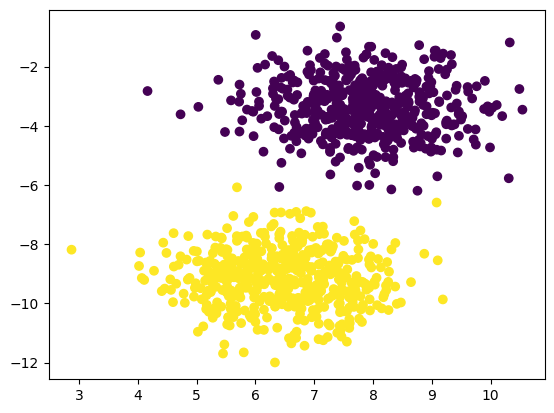

In [2]:
# Carregam dades
# Farem feina amb dades sintètiques

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
X, y = make_blobs(n_samples=1000, centers=2, n_features=2,random_state=6)

print(X[:5])
print(y[:5])

# Visualitzam les dades
plt.scatter(X[:,0], X[:,1], c=y)

Em de separar les dades en dades d'entrenament i avaluació. Les primeres s'empren per que el model aprengui mentre que les segones són emprades per avaluar si  el model ha après realment, o dit d'una altra manera sí no pateix ni d'**overfitting** ni de **underfitting**.

In [3]:
x_train, x_test,  y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0)

In [4]:
print(x_train.shape)
print(y_train.shape)

(800, 2)
(800,)


El model de la regressió logística el trobarem a la llibreria *sklearn*. Tots els models d'aquesta llibreria tenen un conjunt de funcions comunes com poden ser ``predict`` o ``fit``. Aquesta darrera és la que dur a terme el procés d'entrenament de tots els models.

In [5]:
# Entrenamos el modelo
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

Una vegada tenim el model entrenat podem fer prediccions de noves dades. Ara però volem saber la qualitat del nostre model per fer-ho emprarem dos elements:

-  El conjunt de test, que hem reservat amb aquest objectiu.
-  Un subconjunt de les mètriques ja introduides que ens indicaran la qualitat de les predicció

Les tres mètriques que observarem s'interpreten de la mateixa forma: quan major millor, sent el millor resultat possible en els tres casos un valor de 1.


In [6]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("-"*20)
print(model.score(X,y))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       113
           1       0.99      1.00      0.99        87

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200

--------------------
0.999


Observam que hem obtingut un resultat pròxim a la perfecció, indicat pel valor **1**. A més el model ens proporciona la recta que separa les dades i per tant podem visualitzar-la.


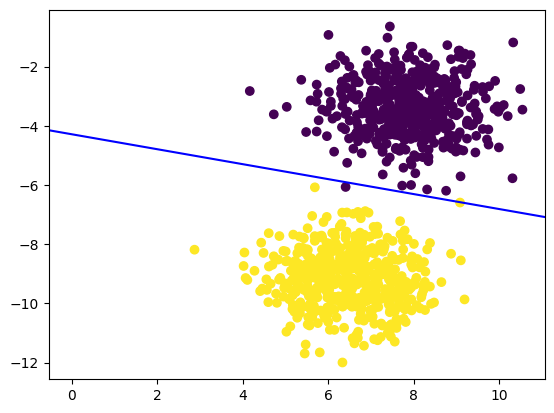

In [7]:
m = -model.coef_[0][0] / model.coef_[0][1]
x1 = (0, -model.intercept_[0] / model.coef_[0][1]) 
plt.scatter(X[:,0], X[:,1], c=y)
plt.axline(xy1=x1, slope=m,color="blue")

#### <span style="color:red">Activitats</span>

**Activitat 6.1**

Donada la següent mostres de dades reals, on classificaries cadascuna d'elles? Quina accuracy s'ha obtingut?
- Nota: en la documentació hi ha dues funcions: *predict* i *predic_proba*. Quines diferències hi ha aplicant cadascuna d'elles?

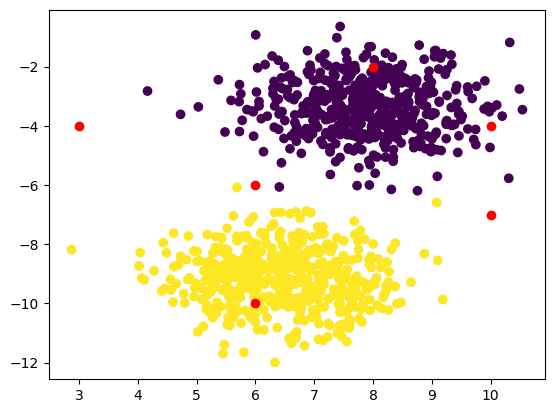

In [8]:
X_real = np.array([[6,-10],[6, -6],[8, -2],[10, -4],[3, -4],[10,-7]])
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(X_real[:,0],X_real[:,1],c="red")

**Activitat 6.2**

Calcula la matriu de confussió aplicant el mètode: sklearn.metrics.confusion_matrix

La llibreria scikit-learn ens permet emprar gran quantitat d'algoritmes sense suposar un gran canvi alhora de programar-los. Tot seguit veurem un petit conjunt d'exemples.

## Algoritme lineal: Support Vector Machine

https://en.wikipedia.org/wiki/Support_vector_machine


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC


[[ 0.10049183  0.48800911]
 [-1.13103537  1.09946452]
 [-1.41857135 -0.86904789]
 [-0.57911797 -1.2615109 ]
 [-0.10760837 -2.13413139]]
[0 0 1 1 1]


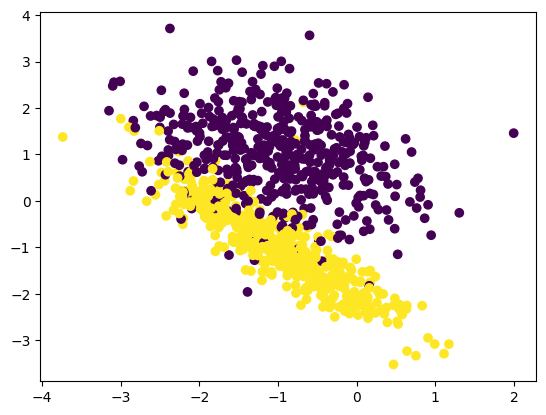

In [10]:
# Datos sintéticos
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, 
                           random_state=2023, n_clusters_per_class=1)

print(X[:5])
print(y[:5])

plt.scatter(X[:,0],X[:,1],c=y);

Afegirem més complexitat al problema tot introduïnt "dispersió" a les provocant un major solapament entre les classes.


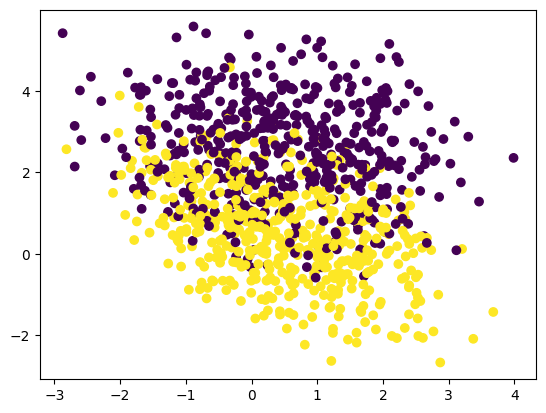

In [11]:
rng = np.random.RandomState(2023)
X += 3 * rng.uniform(size=X.shape)

plt.scatter(X[:,0],X[:,1],c=y)

**Activitat 6.3**

- Separa el conjunt de dades X i y en dos conjunts: entrenament i test.
- Entrena una (SVM)[https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html] amb el paràmetre C=0.0001.
- Muestra la matriu de confussió i calcula la precició (tp / (tp + fp)) de la clasificación.

In [12]:
# Prepara les dades

In [13]:
# Construeix el model i entrenament

In [14]:
# Mètriques

**Activitat 6.4**

Analitza com es comporta l'algorisme modificant el paràmetre de regulació (C). Retoca el següent codi per a poder representar els segments de separació de classes entre cada valor. Has de fer ús de l'eina de sklearn [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [ ]:
import matplotlib.cm as cm

Cs = [ 0.0001, 0.001,0.1, 1.0]
colors = cm.rainbow(np.linspace(0, 1, len(Cs)))

plt.figure(figsize=(16,4))

for idx, C in enumerate(Cs):
    
    model = LinearSVC(C=C, random_state=0)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    
    m = -model.coef_[0][0] / model.coef_[0][1]
    x1 = (0, -model.intercept_[0] / model.coef_[0][1])
    
    ax = plt.subplot(1, 4, idx + 1)  # Afegim la subfigura a una figura més grossa de quatre columnes
    ax.set_title("C="+ str(C))
    ax.axline(xy1=x1, slope=m,color=colors[idx])
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k")

### Algoritme lineal amb multiclasse: SVM

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn import datasets

Farem feina amb el conjunt de dades ``iris``. És un conjunt de dades molt extès per fer aprenentatge automàtic. Aquest conjunt de dades consta de 3 tipus diferents d'iris (Setosa, Versicolour i Virginica) i la seva longitud pètal i sèpal. Podeu trobar més informació [aquí](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html). També l'objecte de ``scikit-learn`` disposa d'un atribut ``DESCR`` que ens aporta informació sobre aquestes dades.

In [17]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

**Activitat 6.5**

- Prepara les dades d'entrenament
- Aplica l'algorisme SVM per a adaptar-ho en el context multiclase. Mira la documentació de ``scikit-learn``.
- Analitza la qualitat dels resultatas: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report


### Classificació no lineal

Fins ara hem trobat que són linealment separables: és a dir que ho podiem separar definint una divisió lineal de l'espai. Això però no podem aplicar-ho sempre ja que hi ha casos on les dades no tenen aquesta característica. És per això que es necessari l'ús d'algoritmes més complexes per poder-ho resoldre: **algoritmes no lineals**. Hi ha molts d'algoritmes d'aquest tipus, així i tot, el primer que veurem serà l'algoritme *SVM* adaptat per aquest tipus de problema.

L'adaptació de *SVM* a problemes no lineals s'aconsegueix mitjançant el que s'anomena [truc del kernel](https://en.wikipedia.org/wiki/Kernel_method). Aquesta operació matemàtica ens permet convertir un model lineal com l'SVM a un no lineal. Hi ha molts de kernels diferents, els més emprats són el polinòmic i l'RBF (Radial Basis Function).

#### RBF

Per a usar-ho necessitem ajustar dos hiperparàmetres: el paràmetre de regularització C i un segon paràmetre gamma, a major valor d'aquest paràmetre condueix a un límit de decisió més suau.

Per a usar SVM no lineals a ``scikit-learn`` amb kernel RBF, ho farem de la manera següent:

```python
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=1.0)
```

**Polinòmic**<br/>
A efectes pràctics no és molt recomanable usar polinomis amb grau major a 3, ja que correm el risc de sobreajustar el classificador a les dades i a més el temps d'entrenament creix.

```python
from sklearn.svm import SVC
svm = SVC(kernel='poly', random_state=0, gamma=0.10, C=1.0)
```

Podeu trobar més informació dels diferents *kernels* i paràmetres al següent [enllaç](https://scikit-learn.org/stable/modules/svm.html#svm-kernels).

Anem a visualitzar el que suposa emprar aquests *kernels*.

In [18]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn.svm import SVC

In [19]:
##### ALERTA --- CODI PER A LA VISUALITZACIÓ DELS PROPERS RESULTATS
##### No es considera que formi part d'aquest curs.
##### FONT: http://rasbt.github.io/mlxtend/

def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

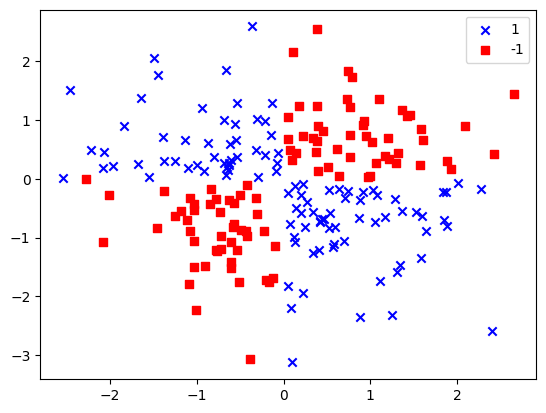

In [20]:
# Generam dades sintètiques
np.random.seed(2023)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')


plt.legend(loc='best')
plt.show()

Primer farem una classificació amb un SVM **lineal**, on veurem les limitacions d'aquests models.

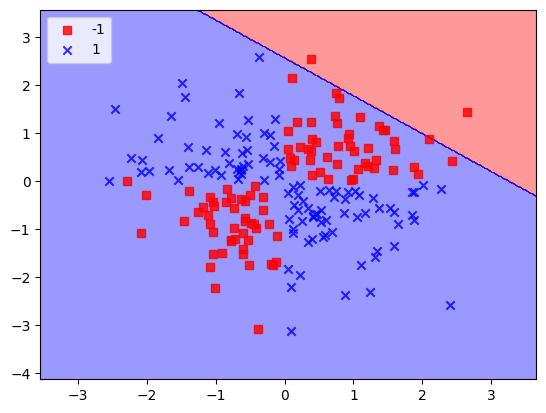

In [21]:
# Clasificación usando SVM lineal

svm = SVC(kernel='linear', C=1, random_state=0)
svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

### Classificació amb un kernel RBF

El kernel RBF té dos paràmetres:

**gamma** és un paràmetre del kernel RBF i es pot considerar com l'"extensió" del kernel i, per tant, la regió de decisió. Quan la gamma és baixa, la "corba" del límit de decisió és molt baixa i, per tant, la regió de decisió és molt àmplia. Quan la gamma és alta, la "corba" del límit de decisió és alta, la qual cosa crea illes de límits de decisió entorn dels punts de dades. Això ho veurem molt clar a continuació.

**C** és un paràmetre propi de les SVM i és la penalització per classificar erròniament una observació. Quan C és petit, el classificador està d'acord amb els punts de dades mal classificades (alt biaix, baixa variància). Quan C és gran, el classificador penalitza molt les dades erròniament classificades i, per tant, evita qualsevol observació erròniament classificada (baix biaix, major variància).

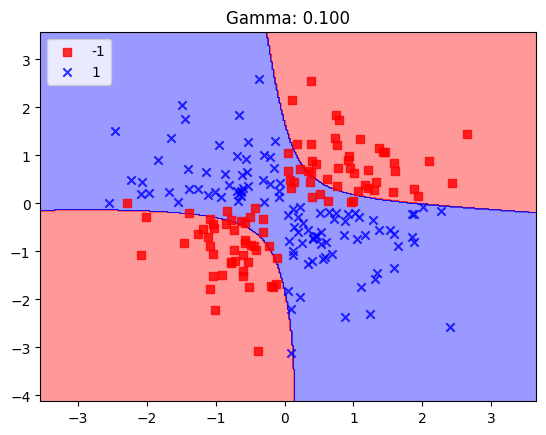

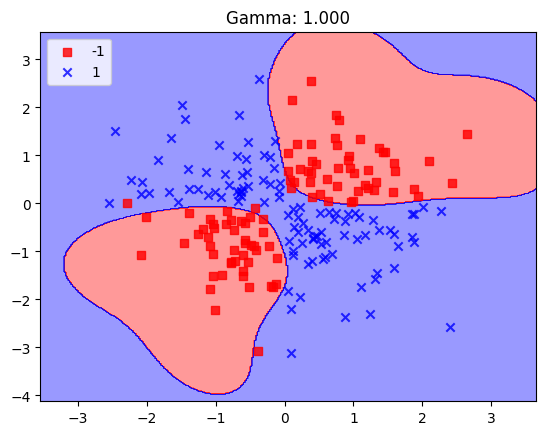

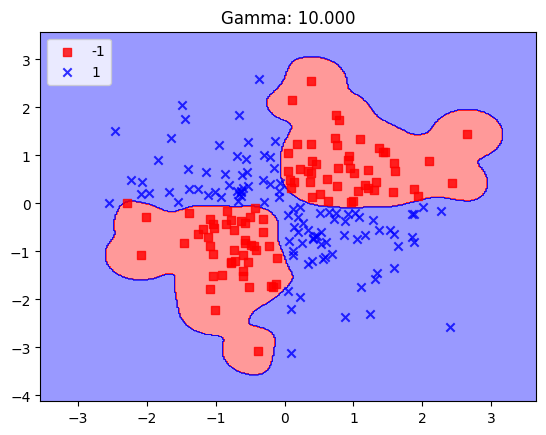

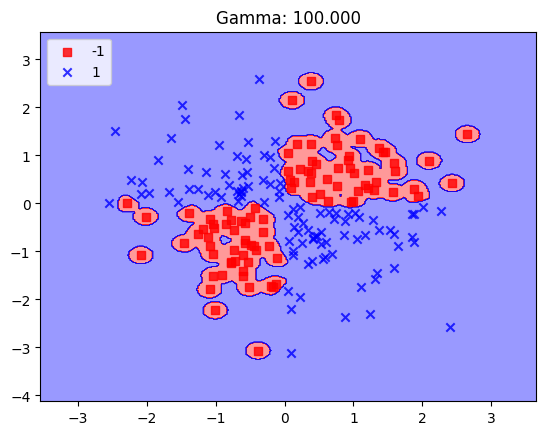

In [22]:
gamma = [.1,1,10,100]

for g in gamma:
    svm = SVC(kernel='rbf', random_state=0, gamma=g, C=1)
    # Train the classifier
    svm.fit(X_xor, y_xor)

    # Visualize the decision boundaries
    plot_decision_regions(X_xor, y_xor, classifier=svm)
    plt.legend(loc='upper left')
    plt.title("Gamma: %0.3f"%g)
    plt.show()

**Activitat 6.6**

L'objectiu d'aquest exercici és valorar les característiques d'uns models de vehicles per a conèixer la seva qualitat: *unaccuracy, accuracy, good, i very good*. Variable *class*.

- Càrrega i explora les dades de l'arxiu: *data/car_evaluation.csv*.
- Prepara les dades (X,i) i separa per a l'entrenament
- Aplica el model RandomForest

    ```python
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(*random_*state=0)
    ```
    
- Entrena
- Comprova la seva accuracy:
  
    ```python
    from sklearn.metrics import accuracy_*score
    print("*Model accuracy score : %0.4f" %accuracy_*score(i_test, i_pred))
    ```
    
- Com es comporten els resultats variant el nombre d'arbres?

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

pathFile = "data/car_evaluation.csv"
df = pd.read_csv(pathFile)

print(df.shape)
print(df.describe())
print(df.head())


LabelEncoder()

(1727, 7)
       vhigh vhigh.1     2   2.1 small   low  unacc
count   1727    1727  1727  1727  1727  1727   1727
unique     4       4     4     3     3     3      4
top     high    high     3     4   med   med  unacc
freq     432     432   432   576   576   576   1209
   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc


LabelEncoder()

## Regressió

La principal diferència respect la classificació és el que es vol predir. Mentre que en la classificació volem predir un categoria aquí és un valor. Existeixen nombrosos algorismes supervisats per a la regressió, destaquem:

- Regressió Lineal / *Linear regression*: https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal
- Regressió logística / *Logistic regression*: https://es.wikipedia.org/wiki/Regresi%C3%B3n_log%C3%ADstica
- Màquines de vectors de suport / *SVM*: https://es.wikipedia.org/wiki/M%C3%A1quinas_de_vectores_de_soporte
- CART / *Classification And Regression Trees*: https://www.nature.com/articles/nmeth.4370
- Potenciació del gradient/ *Gradient Boosting*: https://es.wikipedia.org/wiki/Gradient_boosting
- Boscos aleatoris / *Random Forest*: https://es.wikipedia.org/wiki/Random_forest
- *Artificial Neural Networks* (*):  https://en.wikipedia.org/wiki/Artificial_neural_network
- K-vecinos cercanos / *K-nearest neighbors* (k-nn): https://es.wikipedia.org/wiki/K_vecinos_m%C3%A1s_pr%C3%B3ximos
- Análisis Discriminantel Lineal / LDA: https://es.wikipedia.org/wiki/An%C3%A1lisis_discriminante_lineal
- etc.


La gran majoria estan implementats en la llibreria de python [scikit-learn/supervised_learning](https://scikit-learn.org/stable/supervised_learning.html), per tant segueixen una estructura similar als algoritmes de classificació que ja em vist fins ara.

<img src="images/ModelSelection_ref_book_5.png" width=90%/>

> Font de la imatge: [5] Machine Learning & Data Science Blueprints for Finance


### Mètriques per a problemes de regressió

Les mètriques més comunes en els problemes de regressió són l'**error quadràtic** i l'**error absolut**, i les seves diferents modificacions.

#### Errors quadràtics

L'error quadràtic (Squared Error) d'un valor predit respecte al valor real, es calcula com:

$$ SE = \sum_j\left[\hat{y}_j - y_j\right]^2$$

**Error quadràtic mitjà (Mean Squared Error)** Dóna una idea de l'error de les nostres prediccions donant més pes als errors grans.

$$ MSE = \frac{1}{m}\sum_j^m \left[\hat{y}_j - y_j\right]^2  $$


**Arrel de l'error quadràtic mitjà (Root Mean Square Error)*** L'arrel quadrada del MSE produeix l'error de l'arrel quadrada de la mitjana o la desviació de l'arrel quadrada mitjana (RMSE o RMSD). Té les mateixes unitats que la quantitat que estima. Per a un estimador sense biaix, el RMSE és l'arrel quadrada de la variància, és a dir, la desviació estàndard.

$$RMSE = \sqrt{\frac{1}{m}\sum_j^m \left[\hat{y}_j - y_j\right]^2}$$

Tot i ser una de les mètriques més utilitzades, té l'inconvenient de ser sensible als valors extrems (outliers). Quan aquest comportament pot suposar un problema, els errors absoluts poden donar-nos una millor mesura de rendiment.

In [24]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


### Regressió lineal

Per pràctica amb problemes de regressió cream un conjunt de dades sintètiques.

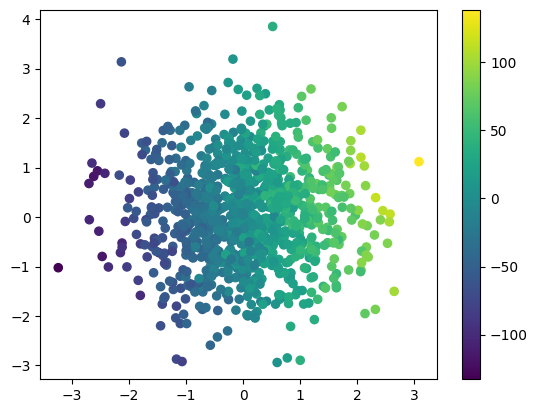

In [26]:
import sklearn.datasets as dt

X,Y = dt.make_regression(n_samples=1000,
                             n_features=2,
                             noise=10,
                             random_state=42)

plt.scatter(X[:,0], X[:,1], c=Y, s=35)
plt.colorbar();

Emprarem el model més simple de regressió: la **regressió lineal**. 

La regressió lineal ens permet modelar la relació entre l'etiqueta (Y) i una o més variables independents (X). L'objectiu és trobar una línia recta que millor s'ajusti a les dades i que permeti predir el valor de la Y en funció dels valors de les variables X. En el cas més simple, es tracta d'una relació entre dues variables, representada per l'equació de la recta:

$$y = \beta_0 + \beta_1 x + \epsilon$$

on y és la variable dependent, x és la variable independent, $\beta_0$ és la intersecció, $\beta_0$ és la pendent, i $\epsilon$ representa l'error o residu.

Tot i que el model es molt diferent als que hem vist fins ara, gràcies a l'abstracció que ens aporta ``scikit-learn`` podem entrenar-ho com els models de classificació.


In [27]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=33)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

És important mesurar la qualitat de la predicció per fer-ho emprarem mètriques especialitzades en problemes de regressió. En particular emprarem l'error mitjà al quadrat, *MSE*.

In [28]:
from sklearn.metrics import mean_squared_error

mean_squared_error(lr.predict(X_test), y_test)

np.float64(102.59434409135012)

En el cas de la regressió les mètriques són més complexes d'analitzar. Mostram com quedaria gràficament la predicció.

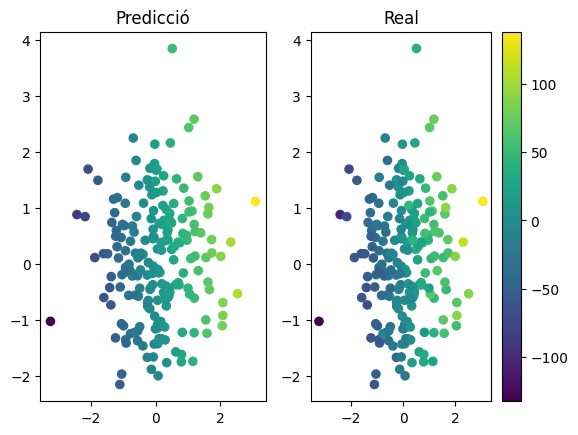

In [29]:
plt.subplot(1,2,1)
plt.title("Predicció")
plt.scatter(X_test[:,0], X_test[:,1], c=lr.predict(X_test), s=35)
plt.subplot(1,2,2)
plt.title("Real")
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=35)
plt.colorbar()

Podem observar que la predicció es molt similar a l'etiqueta. L'explicació de l'error amb un valor alt es per la tipologia de la mètrica emprada: retorna la diferència mitjana entre les prediccions, i per tant, dependrà del rang d'aquestes.

#### <span style="color:red">Activitats</span>

Aplicar una tècnica de regressió sobre el valor mitjà d'un habitatge segons districtes a Califòrnia.

Recordeu:

El procés d'aprenentatge automàtic sol constar d'una sèrie de passos. En general, aquests són:

- Preparació de dades. Càrrega i neteja de dades
> Dataset: California-housing-dataset
- Selecció d'atributs o mètriques adequades
- Selecció de la tècnica a aplicar
> LinearRegression
- Ajust de les hiperparàmetres.
- Avaluació del model.

In [30]:
# 0. Llibreries 

from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.linear_model import LinearRegression


In [31]:
# Carregam les dades
data = fetch_california_housing(as_frame=True)
print(data.feature_names)

df = data.frame
print(df.head())

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [32]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Informació dels atributs:

- MedInc: ingressos mitjans en el grup de blocs.
- HouseAge: edat mitjana de les cases en el grup de blocs.
- AveRooms: nombre mitjà d'habitacions per llar.
- AveBedrms: nombre mitjà de dormitoris per llar.
- Population: població del grup de blocs.
- AveOccup: nombre mitjà de membres per llar.
- Latitude: latitud del grup de blocs.
- Longitude: longitud del grup de blocs.

La variable objectiu és el valor mitjà de les cases per als districtes de Califòrnia, expressat en centenars de milers de dòlars ($100,000).

[![License: CC BY 4.0](https://img.shields.io/badge/License-CC_BY_4.0-lightgrey.svg)](https://creativecommons.org/licenses/by/4.0/) <br/>
Authors: [Isaac Lera](https://personal.uib.cat/isaac.lera), [Miquel Miró](https://personal.uib.cat/miquel.miro) and [Biel Moyà](https://personal.uib.cat/gabriel.moya)<br/>
Institution: Universitat de les Illes Balears (UIB) <br/>